In [1]:
import autograd.numpy as np
from autograd import jacobian

def F_func(x, u):
    return np.array([x**2, np.sin(u)])

def get_jacobian_func(func, argnum):
    jacobian_func = jacobian(func, argnum=argnum)
    return lambda *args: jacobian_func(*args)

F_x = get_jacobian_func(F_func, argnum=0)
x = 2.0
u = 3.0
F_x_prime = F_x(x, u)
print(F_x_prime)
print(jacobian(F_func, argnum=0)(x,u))



[4. 0.]
[4. 0.]


C:\Users\logan\AppData\Local\Temp\ipykernel_16232\3359713876.py:23: DeprecationWarning: The LTI `outputs` attribute will be deprecated in a future release.  Use `noutputs` instead.
  for i in range(sys_ss.outputs*2): # times two to capture the magnitude /and/ phase for each input
C:\Users\logan\AppData\Local\Temp\ipykernel_16232\3359713876.py:27: DeprecationWarning: The LTI `inputs` attribute will be deprecated in a future release.  Use `ninputs` instead.
  for j in range(sys_ss.inputs):
C:\Users\logan\AppData\Local\Temp\ipykernel_16232\3359713876.py:33: DeprecationWarning: The LTI `inputs` attribute will be deprecated in a future release.  Use `ninputs` instead.
  for j in range(sys_ss.inputs):
C:\Users\logan\AppData\Local\Temp\ipykernel_16232\3359713876.py:28: RuntimeWarning: divide by zero encountered in log10
  axs[i, j].semilogx(omega, 20 * np.log10(np.abs(mag[i_adj, j, :])))


0
1
i_phase =
0
i_phase =
0
2
3
i_phase =
1
i_phase =
1


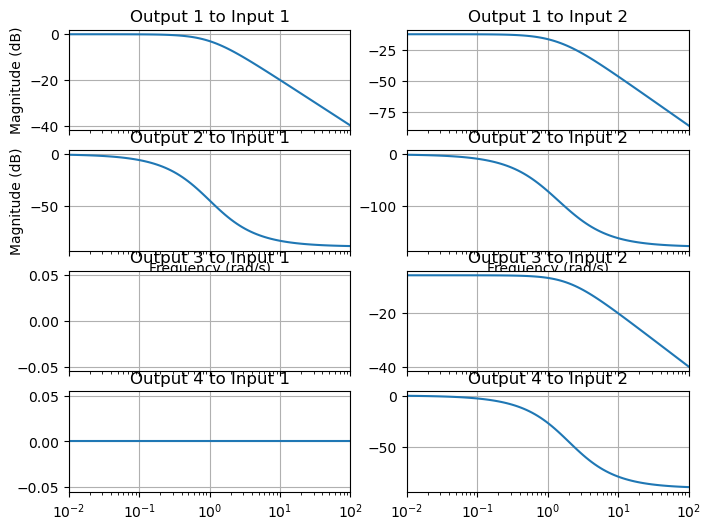

In [15]:
import control
import numpy as np
import matplotlib.pyplot as plt

# Define a MIMO state-space system
A = [[-1, 0.5],
     [0, -2]]
B = [[1, 0],
     [0, 1]]
C = [[1, 0],
     [0, 1]]
D = [[0, 0],
     [0, 0]]
sys_ss = control.ss(A, B, C, D)

# Compute the frequency response
omega = np.logspace(-2, 2, num=100)
mag, phase, omega = control.freqresp(sys_ss, omega)

# Plot the magnitude and phase response
fig, axs = plt.subplots(4, 2, figsize=(8, 6), sharex=True)
i_phase= 0
for i in range(sys_ss.outputs*2): # times two to capture the magnitude /and/ phase for each input
    print(i)
    if i % 2 == 0:
        i_adj = int(i/2)
        for j in range(sys_ss.inputs):
            axs[i, j].semilogx(omega, 20 * np.log10(np.abs(mag[i_adj, j, :])))
            axs[i, j].set_title(f'Output {i+1} to Input {j+1}')
            axs[i, j].grid(True)
            axs[i, j].set_xlim([omega[0], omega[-1]])
    else: 
        for j in range(sys_ss.inputs):
            print("i_phase =")
            print(i_phase)
            hld = np.rad2deg(phase[i_phase, j, :])
            axs[i, j].semilogx(omega, np.rad2deg(phase[i_phase, j, :]))
            axs[i, j].set_title(f'Output {i+1} to Input {j+1}')
            axs[i, j].grid(True)
            axs[i, j].set_xlim([omega[0], omega[-1]])
        i_phase = i_phase + 1 
axs[0, 0].set_ylabel('Magnitude (dB)')
axs[1, 0].set_ylabel('Magnitude (dB)')
axs[1, 0].set_xlabel('Frequency (rad/s)')
axs[1, 1].set_xlabel('Frequency (rad/s)')
plt.show()
